# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)
import statsmodels.api as sm

# Load data 

In [2]:
filename = "K:\coding_DOJO\CarPrice_Assignment.csv"
df = pd.read_csv(filename)
pd.options.display.max_columns = 100
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Explore

In [3]:
# check missing values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# check duplicates
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

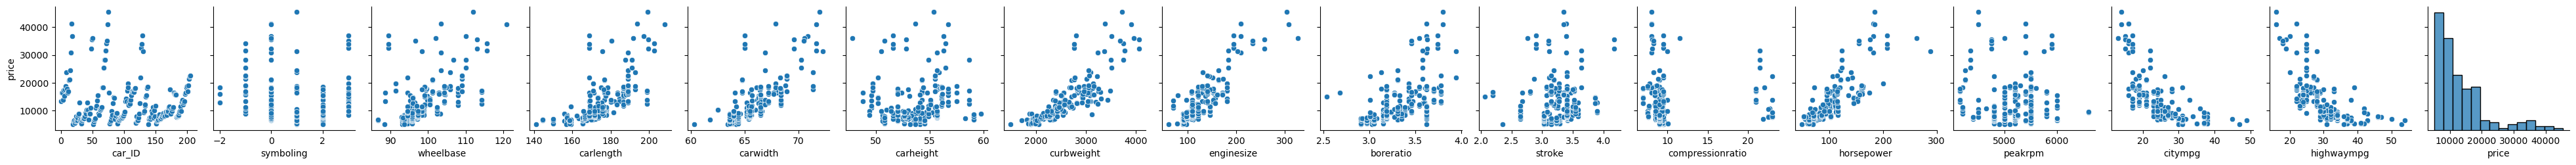

In [6]:

sns.pairplot(df, y_vars='price');

# Preprocessing

## X, y split

In [7]:
y = df['price'] 
X= df.drop(columns= ['car_ID', 'price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)

X_train.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
188,2,volkswagen dasher,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100,5500,26,32
14,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25
128,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25
22,1,dodge challenger se,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38


## Select columns

In [8]:
# make cat selector and save columns
cat_selector = make_column_selector(dtype_include = 'object')
cat_cols = cat_selector(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
# make nun selector and save columns
nun_selector = make_column_selector(dtype_include = 'number')
num_cols = nun_selector(X_train)
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

## Make_column_transformer

In [10]:
#Create a OneHotEncoder for one-hot encoding the categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [11]:
cat_tuple = (ohe, cat_cols)

In [12]:
preprocessor = make_column_transformer(cat_tuple, remainder = 'passthrough')

In [13]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

## Getting feature names

In [14]:
preprocessor.fit(X_train)
## Finding the categorical pipeline in our col transformer.
ohe_step = preprocessor.named_transformers_['onehotencoder']
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [15]:
X_train_processed = preprocessor.transform(X_train)
X_train_processed

array([[   0.,    0.,    0., ..., 5400.,   23.,   28.],
       [   0.,    0.,    0., ..., 5500.,   26.,   32.],
       [   0.,    0.,    0., ..., 4250.,   20.,   25.],
       ...,
       [   0.,    0.,    0., ..., 5000.,   31.,   38.],
       [   0.,    0.,    0., ..., 5250.,   21.,   28.],
       [   0.,    0.,    0., ..., 4800.,   24.,   29.]])

In [16]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero giulia',
       'CarName_alfa-romero stelvio', 'CarName_audi 100 ls',
       'CarName_audi 100ls', 'CarName_audi 4000', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x4', 'CarName_bmw x5', 'CarName_bmw z4',
       'CarName_buick century', 'CarName_buick century luxus (sw)',
       'CarName_buick electra 225 custom',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet monte carlo',
       'CarName_dodge challenger se', 'CarName_dodge colt hardtop',
       'CarName_dodge monaco (sw)', 'CarName_honda accord',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 1500 gl', 'CarName_honda civic cvcc',
       'CarName_

In [17]:
len(cat_features)

148

In [18]:
## Create the list with cat and num columns
final_features = [*cat_features, *num_cols]
len(final_features)

162

In [19]:
final_features

['CarName_Nissan versa',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet monte carlo',
 'CarName_dodge challenger se',
 'CarName_dodge colt hardtop',
 'CarName_dodge monaco (sw)',
 'CarName_honda accord',
 'CarName_honda accord lx',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_isuzu D-Max V-Cross',
 'CarName_isuzu MU-X',
 'CarName_jaguar xf',
 'CarName_jaguar x

In [20]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(153, 162)

In [21]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_tf.head()

,CarName_Nissan versa,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet monte carlo,CarName_dodge challenger se,CarName_dodge colt hardtop,CarName_dodge monaco (sw),CarName_honda accord,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,...,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,97.3,171.7,65.5,55.7,2300.0,109.0,3.19,3.40,10.0,100.0,5500.0,26.0,32.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,89.5,168.9,65.0,51.6,2800.0,194.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,93.7,157.3,63.8,50.8,1876.0,90.0,2.97,3.23,9

In [22]:
## make X_test_tf 

X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,CarName_Nissan versa,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet monte carlo,CarName_dodge challenger se,CarName_dodge colt hardtop,CarName_dodge monaco (sw),CarName_honda accord,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,...,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,97.0,172.0,65.4,54.3,2510.0,108.0,3.62,2.64,7.7,111.0,4800.0,24.0,29.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,93.7,167.3,63.8,50.8,1989.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,93.3,157.3,63.8,55.7,2240.0,108.0,3.62,2.64,8.7,73.0,4400.0,26.0,31.0
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,97.3,171.7,65.5,55.7,2264.0,97.0,3.01,3.40,23.

In [23]:
# other way to get feature name : name = preprocessor.get_feature_names_out() 

## Standard Statsmodels

### Adding a Constant for Statsmodels

In [24]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, has_constant='add')
display(X_test_df.head(), X_train_df.head())

,const,CarName_Nissan versa,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet monte carlo,CarName_dodge challenger se,CarName_dodge colt hardtop,CarName_dodge monaco (sw),CarName_honda accord,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,...,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,97.0,172.0,65.4,54.3,2510.0,108.0,3.62,2.64,7.7,111.0,4800.0,24.0,29.0
203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0
121,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,93.7,167.3,63.8,50.8,1989.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,93.3,157.3,63.8,55.7,2240.0,108.0,3.62,2.64,8.7,73.0,4400.0,26.0,31.0
184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,97.3,171.7,65.5,55.7,2264.0,97.0,3.01,3.40,23.0,52.0,4800.0,37.

,const,CarName_Nissan versa,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet monte carlo,CarName_dodge challenger se,CarName_dodge colt hardtop,CarName_dodge monaco (sw),CarName_honda accord,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,...,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,97.3,171.7,65.5,55.7,2300.0,109.0,3.19,3.40,10.0,100.0,5500.0,26.0,32.0
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0
128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,89.5,168.9,65.0,51.6,2800.0,194.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0
22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,93.7,157.3,63.8,50.8,1876.0,90.0,2.97,3.23,9.4,68.0,5500.0,31

### Modeling

In [25]:
## instantiate an OLS model WITH the training data.
model= sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     84.47
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.16e-09
Time:                        23:56:35   Log-Likelihood:                -1061.9
No. Observations:                 153   AIC:                             2408.
Df Residuals:                      11   BIC:                             2838.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    8827.8005   8965.039      0.985      0.346   -1.09e+04    2.86e+04
CarName_Nissan versa                      -51.1933   1273.104     -0.040      0.969   -2853.277    2750.890
CarName_alfa-romero giulia              -4502.2748   1868.110     -2.410      0.035   -8613.957    -390.593
CarName_alfa-romero stelvio             -1497.2748   1868.110     -0.801      0.440   -5608.957    2614.407
CarName_audi 100 ls                      3507.1772   2217.090      1.582      0.142   -1372.605    8386.960
CarName_audi 100ls                       -599.0612   1889.614     -0.317      0.757   -4758.074    3559.952
CarName_audi 4000                         719.5292   1918.947      0.375      0.715   -3504.045    4943.103
CarName_audi 5000                        2118.3893   2158.904      0.981      0.348   -2633.326    6870.105
CarName_audi 5000s (diesel)             -2003.7162   1876.842     -1.068      0.309   -6134.617    2127.185
CarName_audi fox                         1423.3707   2034.673      0.700      0.499   -3054.915    5901.656
CarName_bmw 320i                         2707.7273   1784.707      1.517      0.157   -1220.387    6635.842
CarName_bmw x1                           1.411e+04   4725.549      2.985      0.012    3705.919    2.45e+04
CarName_bmw x3                           1.205e+04   4649.708      2.592      0.025    1818.308    2.23e+04
CarName_bmw x4                           2.088e+04   4750.748      4.394      0.001    1.04e+04    3.13e+04
CarName_bmw x5                            2.96e+04   3807.912      7.774      0.000    2.12e+04     3.8e+04
CarName_bmw z4                           1.225e+04   3757.292      3.260      0.008    3978.642    2.05e+04
CarName_buick century                    1588.8782   1802.613      0.881      0.397   -2378.646    5556.402
CarName_buick century luxus (sw)         2272.7216   1841.577      1.234      0.243   -1780.562    6326.006
CarName_buick electra 225 custom        -1631.6922   1471.017     -1.109      0.291   -4869.380    1605.995
CarName_buick opel isuzu deluxe         -6814.8747   3099.077     -2.199      0.050   -1.36e+04       6.148
CarName_buick regal sport coupe (turbo)  9885.4452   2913.373      3.393      0.006    3473.154    1.63e+04
CarName_buick skyhawk                    -342.7923   2053.919     -0.167      0.870   -4863.438    4177.854
CarName_buick skylark                   -3741.4814   2296.355     -1.629      0.132   -8795.725    1312.762
CarName_chevrolet monte carlo           -5827.8137   2843.912     -2.049      0.065   -1.21e+04     431.594
CarName_dodge challenger se             -2857.8046   1864.154     -1.533      0.154   -6960.780    1245.171
CarName_dodge colt hardtop              -6139.0161   1952.0

### Get train data performance from skearn to confirm matches OLS

In [26]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.999
Testing R^2: 0.696


# model 2 - Checking Linear Regression Assumptions

##  Checking Linearity

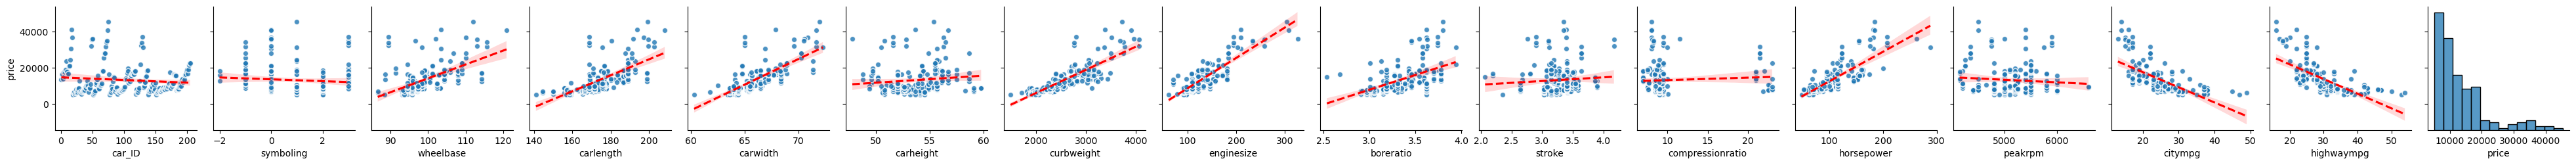

In [27]:
## Making a pairplot with regression lines
sns.pairplot(df, y_vars='price',kind='reg',
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

Looking at the regression plots above, 'peakrpm', 'compressionratio', 'stroke', 'carheight', 'sumboling', 'car_ID' do not seem to have a linear relationship to our target. We will drop them from the dataset.

In [28]:
## dropping nonlinear features
df = df.drop(columns=[ 'peakrpm', 'compressionratio', 'stroke', 'carheight', 'symboling', 'car_ID'])

## Checking for the Assumption of Little-to-No Multicollinearity

We want to identify any pairs of features that have a correlation value of less than -0.8 or greater than +0.8.

In [29]:
## Calc abs values of correlations
corr = df.corr().abs()
corr

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_10020\2696322970.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().abs()


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.470414,0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.670909,0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.642704,0.677218,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.757414,0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.653658,0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.584532,0.587012,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.801456,0.770544,0.808139
citympg,0.470414,0.670909,0.642704,0.757414,0.653658,0.584532,0.801456,1.000000,0.971337,0.685751
highwaympg,0.544082,0.704662,0.677218,0.797465,0.677470,0.587012,0.770544,0.971337,1.000000,0.697599
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,0.685751,0.697599,1.000000


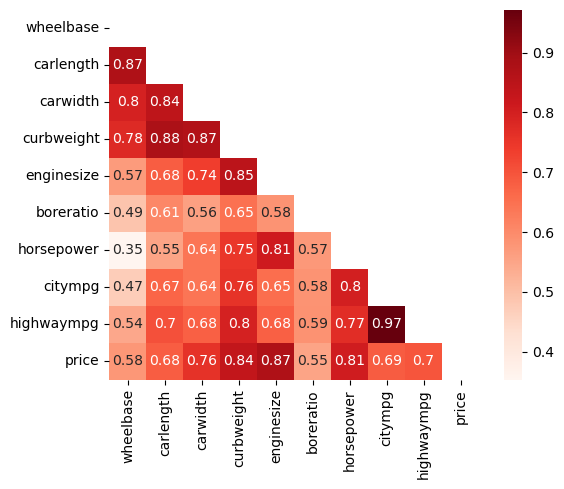

In [30]:
## Calculating the mask to hide the upper-right of the triangle

mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [31]:
## Dropping the column showing high corelation
df = df.drop(columns=['carlength', 'enginesize', 'carwidth', 'highwaympg' ])

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_10020\1069972364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='price').corr().abs()


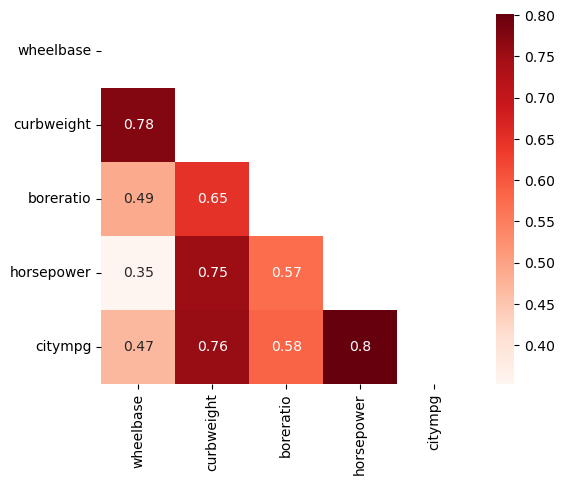

In [32]:
## final check for multicollinearity via correlation
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

Ok, that is much better! We have no remaining correlations above 0.8.

## Running the Mode

### Preprocessing

#### X/y split

In [33]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg
17,bmw x3,gas,std,four,sedan,rwd,front,110.0,3505,ohc,six,mpfi,3.62,182,15
39,honda prelude,gas,std,four,sedan,fwd,front,96.5,2304,ohc,four,1bbl,3.15,86,27
40,honda accord,gas,std,four,sedan,fwd,front,96.5,2372,ohc,four,1bbl,3.15,86,27
47,jaguar xj,gas,std,four,sedan,rwd,front,113.0,4066,dohc,six,mpfi,3.63,176,15
123,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,2535,ohc,four,2bbl,3.35,88,24


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   curbweight      205 non-null    int64  
 9   enginetype      205 non-null    object 
 10  cylindernumber  205 non-null    object 
 11  fuelsystem      205 non-null    object 
 12  boreratio       205 non-null    float64
 13  horsepower      205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  price           205 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 25.8+ KB


In [35]:
df.isna().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
wheelbase         0
curbweight        0
enginetype        0
cylindernumber    0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
price             0
dtype: int64

#### Make column selector

In [36]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [37]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['wheelbase', 'curbweight', 'boreratio', 'horsepower', 'citympg']

#### Make column trasnformer

Do not need SimpleImputer or Scaler just OHE 

In [38]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [39]:
preprocessor = make_column_transformer( (ohe ,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

#### Get feature names 

In [40]:
preprocessor.fit(X_train)
name = preprocessor.get_feature_names_out()
name

array(['onehotencoder__CarName_alfa-romero giulia',
       'onehotencoder__CarName_alfa-romero stelvio',
       'onehotencoder__CarName_audi 100 ls',
       'onehotencoder__CarName_audi 100ls',
       'onehotencoder__CarName_audi 5000',
       'onehotencoder__CarName_audi 5000s (diesel)',
       'onehotencoder__CarName_audi fox',
       'onehotencoder__CarName_bmw 320i', 'onehotencoder__CarName_bmw x1',
       'onehotencoder__CarName_bmw x3', 'onehotencoder__CarName_bmw x5',
       'onehotencoder__CarName_bmw z4',
       'onehotencoder__CarName_buick century',
       'onehotencoder__CarName_buick century luxus (sw)',
       'onehotencoder__CarName_buick century special',
       'onehotencoder__CarName_buick opel isuzu deluxe',
       'onehotencoder__CarName_buick regal sport coupe (turbo)',
       'onehotencoder__CarName_buick skylark',
       'onehotencoder__CarName_chevrolet impala',
       'onehotencoder__CarName_chevrolet monte carlo',
       'onehotencoder__CarName_chevrolet vega 

In [41]:
# checking names 
len(name)

158

In [42]:
# checking X_train transformed 
preprocessor.transform(X_train).shape

(153, 158)

Ok! the number of columns match 

In [43]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), columns=name, index=X_train.index)
X_train_tf.head()

,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x5,onehotencoder__CarName_bmw z4,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick century special,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet impala,onehotencoder__CarName_chevrolet monte carlo,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge challenger se,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge coronet custom,onehotencoder__CarName_dodge coronet custom (sw),onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic 1500 gl,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_jaguar xk,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,...,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__CarName_vw rabbit,onehotencoder__fueltype_diesel,onehotencoder__fueltype_gas,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginetype_dohc,onehotencoder__enginetype_dohcv,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_three,onehotencoder__cylindernumber_twelve,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mfi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,onehotencoder__fuelsystem_spfi,remainder__wheelbase,remainder__curbweight,remainder__boreratio,remainder__horsepower,remainder__citympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,3505.0,3.62,182.0,15.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [44]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), columns=name, index=X_test.index)
X_test_tf.head()

,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x5,onehotencoder__CarName_bmw z4,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick century special,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet impala,onehotencoder__CarName_chevrolet monte carlo,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge challenger se,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge coronet custom,onehotencoder__CarName_dodge coronet custom (sw),onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic 1500 gl,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_jaguar xk,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,...,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__CarName_vw rabbit,onehotencoder__fueltype_diesel,onehotencoder__fueltype_gas,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginetype_dohc,onehotencoder__enginetype_dohcv,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_three,onehotencoder__cylindernumber_twelve,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mfi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,onehotencoder__fuelsystem_spfi,remainder__wheelbase,remainder__curbweight,remainder__boreratio,remainder__horsepower,remainder__citympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,113.0,4066.0,3.63,176.0,15.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Fitting the Regression Model

In [45]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_tf)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     28.02
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           3.84e-10
Time:                        23:56:42   Log-Likelihood:                -1171.9
No. Observations:                 153   AIC:                             2616.
Df Residuals:                      17   BIC:                             3028.
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [46]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_tf)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_tf)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.996
Testing R^2: 0.470


Let's check normality and homoscedasticity to see if we can improve R2 score. the r2 score in model 2 was worse than model 1 

# model 3 -  Checking the Assumption of Normality with Q-Q Plots and Homoscedasticity

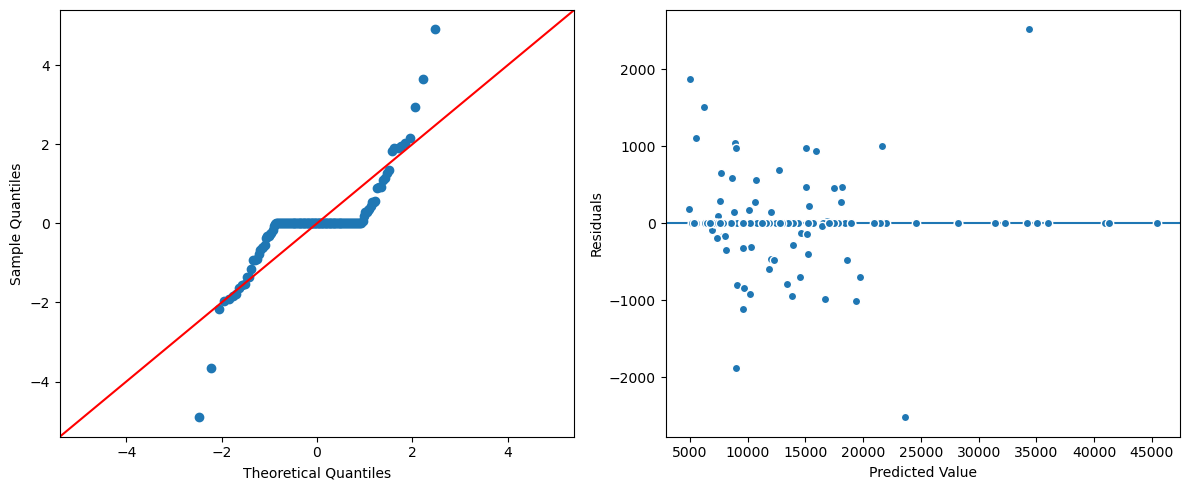

In [47]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_tf, y_train)

Looking at our Q-Q Plot above, we can see that we are clearly violating the assumption of normality. There are some outliers in the left and right tail. 

### Removing Outliers

In [48]:
# create a function to find outliers 

from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [49]:
num_cols

['wheelbase', 'curbweight', 'boreratio', 'horsepower', 'citympg']

In [50]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['wheelbase', 'curbweight', 'boreratio', 'horsepower', 'citympg']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 1 outliers found in wheelbase using Z-Scores.
- 0 outliers found in curbweight using Z-Scores.
- 0 outliers found in boreratio using Z-Scores.
- 2 outliers found in horsepower using Z-Scores.
- 3 outliers found in citympg using Z-Scores.


In [51]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df_clean = df_clean[~idx_outliers]
df_clean

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_10020\1890287056.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~idx_outliers]


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,111,21,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,111,21,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,mpfi,2.68,154,19,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,mpfi,3.19,102,24,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,mpfi,3.19,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,2952,ohc,four,mpfi,3.78,114,23,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,3049,ohc,four,mpfi,3.78,160,19,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,3012,ohcv,six,mpfi,3.58,134,18,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,3217,ohc,six,idi,3.01,106,26,22470.0


## Preprocessing

In [89]:
y = df_clean['price'] 
X= df_clean.drop(columns= ['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)
preprocessor = make_column_transformer(cat_tuple, remainder = 'passthrough')
preprocessor.fit(X_train)
name = preprocessor.get_feature_names_out()
name

array(['onehotencoder__CarName_Nissan versa',
       'onehotencoder__CarName_alfa-romero giulia',
       'onehotencoder__CarName_alfa-romero stelvio',
       'onehotencoder__CarName_audi 100 ls',
       'onehotencoder__CarName_audi 100ls',
       'onehotencoder__CarName_audi 4000',
       'onehotencoder__CarName_audi 5000',
       'onehotencoder__CarName_audi 5000s (diesel)',
       'onehotencoder__CarName_audi fox',
       'onehotencoder__CarName_bmw 320i', 'onehotencoder__CarName_bmw x1',
       'onehotencoder__CarName_bmw x3', 'onehotencoder__CarName_bmw x4',
       'onehotencoder__CarName_bmw x5',
       'onehotencoder__CarName_buick century',
       'onehotencoder__CarName_buick century luxus (sw)',
       'onehotencoder__CarName_buick electra 225 custom',
       'onehotencoder__CarName_buick opel isuzu deluxe',
       'onehotencoder__CarName_buick regal sport coupe (turbo)',
       'onehotencoder__CarName_buick skyhawk',
       'onehotencoder__CarName_buick skylark',
       'oneh

In [90]:
# checking names 
len(name)

154

In [91]:
# checking X_train transformed 
preprocessor.transform(X_train).shape

(149, 154)

In [92]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), columns=name, index=X_train.index)
X_train_tf.head()

,onehotencoder__CarName_Nissan versa,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 4000,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x4,onehotencoder__CarName_bmw x5,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick electra 225 custom,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skyhawk,onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge colt hardtop,onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu D-Max V-Cross,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_maxda glc deluxe,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,onehotencoder__CarName_mitsubishi g4,...,onehotencoder__CarName_volkswagen 1131 deluxe sedan,onehotencoder__CarName_volkswagen model 111,onehotencoder__CarName_volkswagen rabbit custom,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 245,onehotencoder__CarName_volvo 246,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__fueltype_diesel,onehotencoder__fueltype_gas,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginelocation_rear,onehotencoder__enginetype_dohc,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,remainder__wheelbase,remainder__curbweight,remainder__boreratio,remainder__horsepower,remainder__citympg
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,97.2,2190.0,3.62,82.0,28.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [93]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), columns=name, index=X_test.index)
X_test_tf.head()

,onehotencoder__CarName_Nissan versa,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 4000,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x4,onehotencoder__CarName_bmw x5,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick electra 225 custom,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skyhawk,onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge colt hardtop,onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu D-Max V-Cross,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_maxda glc deluxe,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,onehotencoder__CarName_mitsubishi g4,...,onehotencoder__CarName_volkswagen 1131 deluxe sedan,onehotencoder__CarName_volkswagen model 111,onehotencoder__CarName_volkswagen rabbit custom,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 245,onehotencoder__CarName_volvo 246,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__fueltype_diesel,onehotencoder__fueltype_gas,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginelocation_rear,onehotencoder__enginetype_dohc,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,remainder__wheelbase,remainder__curbweight,remainder__boreratio,remainder__horsepower,remainder__citympg
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,89.5,2756.0,3.74,207.0,17.0
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Make & fit a statmsodels OLS

In [94]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_tf)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     50.19
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.33e-11
Time:                        00:26:39   Log-Likelihood:                -1090.8
No. Observations:                 149   AIC:                             2448.
Df Residuals:                      16   BIC:                             2847.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [95]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_tf)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_tf)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.998
Testing R^2: 0.796


After remove outliers, check linearity and multicollinear the Testing R^2 is 0.796 much better than R^2: 0.696, in the first model. 

# model 4 - Remove Columns with Insignificant P-Values

In [96]:
## save p-values
p_vals = result.pvalues
p_vals

onehotencoder__CarName_Nissan versa           0.758917
onehotencoder__CarName_alfa-romero giulia     0.382228
onehotencoder__CarName_alfa-romero stelvio    0.013422
onehotencoder__CarName_audi 100 ls            0.118149
onehotencoder__CarName_audi 100ls             0.022431
                                                ...   
remainder__wheelbase                          0.182345
remainder__curbweight                         0.001794
remainder__boreratio                          0.080610
remainder__horsepower                         0.069208
remainder__citympg                            0.468024
Length: 154, dtype: float64

In [97]:
## filter for p_values that are >.05
p_vals[p_vals>.05]

onehotencoder__CarName_Nissan versa          0.758917
onehotencoder__CarName_alfa-romero giulia    0.382228
onehotencoder__CarName_audi 100 ls           0.118149
onehotencoder__CarName_audi 4000             0.685485
onehotencoder__CarName_audi 5000             0.404528
                                               ...   
onehotencoder__fuelsystem_spdi               0.468974
remainder__wheelbase                         0.182345
remainder__boreratio                         0.080610
remainder__horsepower                        0.069208
remainder__citympg                           0.468024
Length: 121, dtype: float64

In [98]:
## Get list of ALL CarName columns to see how many are sig
CarName_cols = [c for c in X_train_tf.columns if c.startswith("onehotencoder__CarName_")]
CarName_cols

['onehotencoder__CarName_Nissan versa',
 'onehotencoder__CarName_alfa-romero giulia',
 'onehotencoder__CarName_alfa-romero stelvio',
 'onehotencoder__CarName_audi 100 ls',
 'onehotencoder__CarName_audi 100ls',
 'onehotencoder__CarName_audi 4000',
 'onehotencoder__CarName_audi 5000',
 'onehotencoder__CarName_audi 5000s (diesel)',
 'onehotencoder__CarName_audi fox',
 'onehotencoder__CarName_bmw 320i',
 'onehotencoder__CarName_bmw x1',
 'onehotencoder__CarName_bmw x3',
 'onehotencoder__CarName_bmw x4',
 'onehotencoder__CarName_bmw x5',
 'onehotencoder__CarName_buick century',
 'onehotencoder__CarName_buick century luxus (sw)',
 'onehotencoder__CarName_buick electra 225 custom',
 'onehotencoder__CarName_buick opel isuzu deluxe',
 'onehotencoder__CarName_buick regal sport coupe (turbo)',
 'onehotencoder__CarName_buick skyhawk',
 'onehotencoder__CarName_buick skylark',
 'onehotencoder__CarName_chevrolet vega 2300',
 'onehotencoder__CarName_dodge colt (sw)',
 'onehotencoder__CarName_dodge col

In [99]:
# check size 
len(CarName_cols)

116

In [100]:
## save just carname pvalues
carName_pvals = p_vals[CarName_cols]
carName_pvals.sum()/len(CarName_cols)

0.3822638696229424

Carname columns have less than 50% I will keep it 

In [101]:
## Get list of ALL fueltype columns to see how many are sig
fueltype_cols = [c for c in X_train_tf.columns if c.startswith('onehotencoder__fueltype_')]
fueltype_cols[:3]


['onehotencoder__fueltype_diesel', 'onehotencoder__fueltype_gas']

In [102]:
## save just fueltype_cols pvalues
fueltype_pvals = p_vals[fueltype_cols]
fueltype_pvals.sum()/len(fueltype_cols)

0.7975072086614429

Fueltype columns have more than 50% I will drop them.

In [65]:
df_clean.columns


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'horsepower', 'citympg',
       'price'],
      dtype='object')

## Preprocessing 

In [103]:
y = df_clean['price'] 
X= df_clean.drop(columns= ['price', 'fueltype', 'wheelbase', 'horsepower', 'citympg'])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32)


In [105]:
cat_selector = make_column_selector(dtype_include = 'object')
cat_cols = cat_selector(X_train)
cat_cols

['CarName',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [106]:
preprocessor = make_column_transformer((ohe, cat_cols), remainder = 'passthrough')
preprocessor.fit(X_train)
name = preprocessor.get_feature_names_out()
name

array(['onehotencoder__CarName_Nissan versa',
       'onehotencoder__CarName_alfa-romero giulia',
       'onehotencoder__CarName_alfa-romero stelvio',
       'onehotencoder__CarName_audi 100 ls',
       'onehotencoder__CarName_audi 100ls',
       'onehotencoder__CarName_audi 4000',
       'onehotencoder__CarName_audi 5000',
       'onehotencoder__CarName_audi 5000s (diesel)',
       'onehotencoder__CarName_audi fox',
       'onehotencoder__CarName_bmw 320i', 'onehotencoder__CarName_bmw x1',
       'onehotencoder__CarName_bmw x3', 'onehotencoder__CarName_bmw x4',
       'onehotencoder__CarName_bmw x5',
       'onehotencoder__CarName_buick century',
       'onehotencoder__CarName_buick century luxus (sw)',
       'onehotencoder__CarName_buick electra 225 custom',
       'onehotencoder__CarName_buick opel isuzu deluxe',
       'onehotencoder__CarName_buick regal sport coupe (turbo)',
       'onehotencoder__CarName_buick skyhawk',
       'onehotencoder__CarName_buick skylark',
       'oneh

In [107]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), columns=name, index=X_train.index)
X_train_tf.head()

,onehotencoder__CarName_Nissan versa,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 4000,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x4,onehotencoder__CarName_bmw x5,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick electra 225 custom,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skyhawk,onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge colt hardtop,onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu D-Max V-Cross,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_maxda glc deluxe,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,onehotencoder__CarName_mitsubishi g4,...,onehotencoder__CarName_toyota cressida,onehotencoder__CarName_toyota mark ii,onehotencoder__CarName_toyota starlet,onehotencoder__CarName_toyouta tercel,onehotencoder__CarName_vokswagen rabbit,onehotencoder__CarName_volkswagen 1131 deluxe sedan,onehotencoder__CarName_volkswagen model 111,onehotencoder__CarName_volkswagen rabbit custom,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 245,onehotencoder__CarName_volvo 246,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginelocation_rear,onehotencoder__enginetype_dohc,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,remainder__curbweight,remainder__boreratio
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2190.0,3.62
23,0.0,0.0,0.0,0

In [108]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), columns=name, index=X_test.index)
X_test_tf.head()

,onehotencoder__CarName_Nissan versa,onehotencoder__CarName_alfa-romero giulia,onehotencoder__CarName_alfa-romero stelvio,onehotencoder__CarName_audi 100 ls,onehotencoder__CarName_audi 100ls,onehotencoder__CarName_audi 4000,onehotencoder__CarName_audi 5000,onehotencoder__CarName_audi 5000s (diesel),onehotencoder__CarName_audi fox,onehotencoder__CarName_bmw 320i,onehotencoder__CarName_bmw x1,onehotencoder__CarName_bmw x3,onehotencoder__CarName_bmw x4,onehotencoder__CarName_bmw x5,onehotencoder__CarName_buick century,onehotencoder__CarName_buick century luxus (sw),onehotencoder__CarName_buick electra 225 custom,onehotencoder__CarName_buick opel isuzu deluxe,onehotencoder__CarName_buick regal sport coupe (turbo),onehotencoder__CarName_buick skyhawk,onehotencoder__CarName_buick skylark,onehotencoder__CarName_chevrolet vega 2300,onehotencoder__CarName_dodge colt (sw),onehotencoder__CarName_dodge colt hardtop,onehotencoder__CarName_dodge d200,onehotencoder__CarName_dodge rampage,onehotencoder__CarName_honda accord,onehotencoder__CarName_honda accord cvcc,onehotencoder__CarName_honda civic,onehotencoder__CarName_honda civic (auto),onehotencoder__CarName_honda civic 1300,onehotencoder__CarName_honda civic cvcc,onehotencoder__CarName_honda prelude,onehotencoder__CarName_isuzu D-Max,onehotencoder__CarName_isuzu D-Max V-Cross,onehotencoder__CarName_isuzu MU-X,onehotencoder__CarName_jaguar xj,onehotencoder__CarName_maxda glc deluxe,onehotencoder__CarName_maxda rx3,onehotencoder__CarName_mazda 626,onehotencoder__CarName_mazda glc,onehotencoder__CarName_mazda glc 4,onehotencoder__CarName_mazda glc custom,onehotencoder__CarName_mazda glc custom l,onehotencoder__CarName_mazda glc deluxe,onehotencoder__CarName_mazda rx-4,onehotencoder__CarName_mazda rx-7 gs,onehotencoder__CarName_mazda rx2 coupe,onehotencoder__CarName_mercury cougar,onehotencoder__CarName_mitsubishi g4,...,onehotencoder__CarName_toyota cressida,onehotencoder__CarName_toyota mark ii,onehotencoder__CarName_toyota starlet,onehotencoder__CarName_toyouta tercel,onehotencoder__CarName_vokswagen rabbit,onehotencoder__CarName_volkswagen 1131 deluxe sedan,onehotencoder__CarName_volkswagen model 111,onehotencoder__CarName_volkswagen rabbit custom,onehotencoder__CarName_volkswagen type 3,onehotencoder__CarName_volvo 144ea,onehotencoder__CarName_volvo 145e (sw),onehotencoder__CarName_volvo 244dl,onehotencoder__CarName_volvo 245,onehotencoder__CarName_volvo 246,onehotencoder__CarName_volvo 264gl,onehotencoder__CarName_volvo diesel,onehotencoder__CarName_vw dasher,onehotencoder__aspiration_std,onehotencoder__aspiration_turbo,onehotencoder__doornumber_four,onehotencoder__doornumber_two,onehotencoder__carbody_convertible,onehotencoder__carbody_hardtop,onehotencoder__carbody_hatchback,onehotencoder__carbody_sedan,onehotencoder__carbody_wagon,onehotencoder__drivewheel_4wd,onehotencoder__drivewheel_fwd,onehotencoder__drivewheel_rwd,onehotencoder__enginelocation_front,onehotencoder__enginelocation_rear,onehotencoder__enginetype_dohc,onehotencoder__enginetype_l,onehotencoder__enginetype_ohc,onehotencoder__enginetype_ohcf,onehotencoder__enginetype_ohcv,onehotencoder__enginetype_rotor,onehotencoder__cylindernumber_eight,onehotencoder__cylindernumber_five,onehotencoder__cylindernumber_four,onehotencoder__cylindernumber_six,onehotencoder__cylindernumber_two,onehotencoder__fuelsystem_1bbl,onehotencoder__fuelsystem_2bbl,onehotencoder__fuelsystem_4bbl,onehotencoder__fuelsystem_idi,onehotencoder__fuelsystem_mpfi,onehotencoder__fuelsystem_spdi,remainder__curbweight,remainder__boreratio
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2756.0,3.74
191,0.0,0.0,0.0,

## Make & fit a statmsodels OLS

In [109]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_tf)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     39.75
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.56e-12
Time:                        00:27:47   Log-Likelihood:                -1122.6
No. Observations:                 149   AIC:                             2505.
Df Residuals:                      19   BIC:                             2896.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [110]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_tf)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_tf)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.996
Testing R^2: 0.822


Model 4 it is better (82.2%) than model 3 (79.6%). 